# T1.1 Razonamiento probabilístico: representación e inferencia


# Índice

1. El problema de la calificación
2. Representación probabilística
3. Inferencia probabilística
4. Independencia
5. Teorema de Bayes

<p style="page-break-after:always;"></p>

# 1 El problema de la calificación

**Problema de la calificación:** $\;$ imposibilidad práctica de conocer y comprobar todas las **calificaciones** (condiciones) que habría que garantizar para asegurar el cumplimiento de una acción
* Ejemplo: $\;$ salir al aeropuerto 90 minutos antes del vuelo me permite llegar a tiempo SI no hay atascos Y no hay pinchazos Y ...
* Ejemplo: $\;$ un bote nos permite cruzar un río SI es un bote de remo Y tiene remos y escálamos Y no están rotos Y encajan Y ...

**Incertidumbre:** $\;$ los sistemas inteligentes actuales incluyen la **incertidumbre** como parte del conocimiento y la representan mediante **probabilidades** asociadas a los sucesos (proposiciones) de interés

<p style="page-break-after:always;"></p>

# 2 Representación probabilística

**Distribución de probabilidad conjunta:** $\;$ de las variables aleatorias de interés para representar el conocimiento probabilístico

**Ejemplo del dentista:** $\;$ conocimiento para diagnosticar caries

*Variables aleatorias de interés:*

\begin{align*}
&\text{Dolor:} & D&\in\{0,1\}\\
&\text{Caries:}& C&\in\{0,1\}\\
&\text{Hueco:} & H&\in\{0,1\}
\end{align*}

*Representación:* $\;$ tabla a la derecha con
$$P(D=d, C=c, H=h)\quad\text{para todo}\;d, c, h\in\{0,1\}$$

$$\begin{array}{llc}
d & c & b & P\\[1mm]
0 & 0 & 0 & 0.576\\[1mm]
0 & 0 & 1 & 0.008\\[1mm]
0 & 1 & 0 & 0.144\\[1mm]
0 & 1 & 1 & 0.072\\[1mm]
1 & 0 & 0 & 0.064\\[1mm]
1 & 0 & 1 & 0.012\\[1mm]
1 & 1 & 0 & 0.016\\[1mm]
1 & 1 & 1 & 0.108\\[1mm]
\end{array}$$






# 3 Inferencia probabilística

**Reglas suma y producto:** $\;$ reglas básicas para calcular la probabilidad de cualquier **suceso** (**proposición**)
de interés a partir de la distribución conjunta
$$P(x) = \sum_y P(x,y)\qquad\text{y}\qquad P(x,y) = P(x)\,P(y\mid x)$$

**Observación importante:** $\;$ en general no es necesario conocer la tabla completa de probabilidades conjuntas para calcular la probabilidad de un suceso dado mediante las reglas suma y producto

**Ejemplo del dentista:** $\;$ cálculo de la probabilidad de observar...
* Caries y hueco (a la vez): $\displaystyle\;P(c=1,h=1) = \sum_{d=0,1} P(d,c=1,h=1) = 0.180$
* Hueco: $\displaystyle\;P(h=1) = \sum_{d=0,1} \sum_{c=0,1} P(d,c,h=1) = 0.200$
* Caries después de observar hueco: $\displaystyle\;P(c=1\mid h=1) = \frac{P(c=1,h=1)}{P(h=1)} = \frac{0.180}{0.200} = 0.900$

In [1]:
import numpy as np
T = np.array([[0,0,0,.576], [0,0,1,.008], [0,1,0,.144], [0,1,1,.072], 
              [1,0,0,.064], [1,0,1,.012], [1,1,0,.016], [1,1,1,.108]])
Pc1b1 = np.sum(T[(T[:,1]==1) & (T[:,2]==1),-1])
Pb1 = np.sum(T[T[:,2]==1,-1])
Pc1Db1 = Pc1b1/Pb1
print(f"Pc1b1 = {Pc1b1:.3f}  Pb1 = {Pb1:.3f}  Pc1Db1 = {Pc1Db1:.3f}")

Pc1b1 = 0.180  Pb1 = 0.200  Pc1Db1 = 0.900


<p style="page-break-after:always;"></p>

# 4 Independencia

**Variables independientes:** $\;$ dos variables $\,x\,$ y $\,y\,$ son **independientes** si
$$P(x,y) = P(x)\,P(y) \quad\text{o}\quad P(x\mid y) = P(x) \quad\text{o}\quad P(y\mid x) = P(y)$$

**Conocimiento experto:** $\;$ la independencia puede establecerse por conocimiento experto y conveniencia

**Ejemplo del dentista:**
* Consideramos una nueva variable con el tiempo que hace cuando el paciente visita el dentista
$$T\in\{\text{sol}, \text{nubes}, \text{lluvia}, \text{nieve}\}$$
* Asumimos que las tres variables que ya teníamos son independientes del tiempo que hace
$$P(d,c,h,t)=P(t)\,P(d,c,h\mid t)=P(t)\,P(d,c,h)$$
* Así reducimos el número de probabilidades a almacenar: $\;32\,$ vs $\,4+8$

<p style="page-break-after:always;"></p>

# 5 Teorema de Bayes

**Teorema de Bayes:** $\;$ permite actualizar nuestro conocimiento sobre una hipótesis $y$ después de observar una nueva evidencia $x$
$$P(y\mid x) ~=~ \frac{P(x,y)}{P(x)} ~=~ P(y)\,\frac{P(x\mid y)}{P(x)}$$
* De otra manera: $P(y\mid x)$ es la probabilidad de que se produzca el efecto $y$ después de observar que se ha producido la causa $x$

**Ejemplo del dentista:** $\;$
* Sabemos que la probabilidad de caries es: $\,P(c=1)=0.34$
* Sabemos que la probabilidad de dolor es: $\,P(d=1)=0.20$
* Sabemos que la probabilidad de dolor después de observar caries es: $\,P(d=1\mid c=1)=0.36$
* ¿Cúal es la probabilidad de caries después de observar dolor, $\,P(c=1\mid d=1)$?
$$P(c=1\mid d=1) = P(c=1)\,\frac{P(d=1\mid c=1)}{P(d=1)} = 0.34\,\frac{0.36}{0.20} = 0.61$$

In [3]:
Pc1 = 0.34; Pd1 = 0.20; Pd1c1 = 0.36; Pc1Dd1 = Pc1 * Pd1c1 / Pb1; print(f"Pc1Dd1 = {Pc1Dd1:.2f}")

Pc1Dd1 = 0.61


<p style="page-break-after:always;"></p>

# Ejercicios T1.1 Razonamiento probabilístico


**2023_01_26_Cuestión 1:** $\;$ Dada la siguiente tabla de probabilidades conjuntas de tres variables de interés:
$$\begin{array}{|c|cccccccc|}\hline
A & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
B & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1\\
C & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1\\\hline
P(A,B,C) & 0.093 & 0.100 & 0.133 & 0.163 & 0.157 & 0.150 & 0.117 & 0.087\\
\hline\end{array}$$
Cúal és el valor de $P(A=1, B=1 \mid C=1)$?
1. $P(A=1, B=1 \mid C=1) \leq 0.25$
2. $0.25 < P(A=1, B=1 \mid C=1) \leq 0.50$
3. $0.50 < P(A=1, B=1 \mid C=1) \leq 0.75$
4. $0.75 < P(A=1, B=1 \mid C=1)$

<p style="page-break-after:always;"></p>

**Solución:** $\;$ la 1; $\;P(A=1, B=1 \mid C=1) = 0.174$

In [1]:
PA1B1C1 = 0.087; PC1 = 0.1 + 0.163 + 0.15 + 0.087; PA1B1_C1 = PA1B1C1 / PC1; print(PA1B1_C1)

0.174


<p style="page-break-after:always;"></p>

**2023_01_17_Cuestión 1:** Supón que tenemos dos cajas con 40 naranjas en la primera y 80 en la segunda. La primera caja contiene 9 naranjas Navelina y 31 Caracara. La segunda caja contiene tres veces más naranjas Navelina que Caracara. Ahora supón que se escoge una caja al azar, y después una naranja al azar de la caja escogida. Si la naranja escogida es Navelina, la probabilidad $P$ de que proceda de la primera caja es:
1. $0/4\leq P<1/4$.
2. $1/4\leq P<2/4$.
3. $2/4\leq P<3/4$.
4. $3/4\leq P\leq 4/4$.

<p style="page-break-after:always;"></p>

**Solución:**
$$\begin{align*}
P=P(C=1\mid T=N)&=\frac{P(C=1)P(T=N\mid C=1)}{P(C=1)P(T=N\mid C=1)+P(C=2)P(T=N\mid C=2)}\\%
&=\frac{1/2\cdot9/40}{1/2\cdot9/40+1/2\cdot3/4}=\frac{9}{9+30}=0.23
\end{align*}$$

<p style="page-break-after:always;"></p>

**2022_01_27_Cuestión 4:** $\;$ Dada la siguiente tabla de frecuencias conjuntas de tres variables de interés:
$$\begin{array}{|c|cccccccc|}\hline
A & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
B & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1\\
C & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1\\\hline
N(A,B,C) & 124 & 28 & 227 & 175 & 126 & 222 & 23 & 75\\
\hline\end{array}$$
Cúal és el valor de $P(A=1 \mid B=1,C=0)$?
1. $0.023$
2. $0.250$
3. $0.092$
4. $0.446$

<p style="page-break-after:always;"></p>

**Solución:** $\;$ la 3.

<p style="page-break-after:always;"></p>

**2022_01_13_Cuestión 7:** $\;$ Sea un problema de razonamiento probabilístico sobre desplazamientos por carretera, con las variables aleatorias de interés:
* Climatología ($C$): \{claro(CLA), nublado (NUB), lluvia (LLU)\}
* Luminosidad ($L$): \{día (DÍA), noche (NOCHE)\}
* Seguridad ($S$): \{seguro (SEG), accidente (ACC)\}

La probabilidad conjunta de las tres variables viene dada en la tabla:
$$\begin{array}{c|ccc|ccc}
& & \text{DÍA} & & & \text{NOCHE}\\\hline
P(S, L, C) & \text{CLA} & \text{NUB} & \text{LLU} & \text{CLA} & \text{NUB} & \text{LLU}\\\hline
\text{SEG} & 0.27 & 0.23 & 0.07 & 0.16 & 0.07 & 0.06\\
\text{ACC} & 0.02 & 0.01 & 0.02 & 0.02 & 0.03 & 0.04\\\hline\end{array}$$
La probabilidad condicional $P(S=\text{ACC} \mid L=\text{DÍA},C=\text{NUB})$ es:
1. 0.042
2. 0.010
3. 0.240
4. 0.140

<p style="page-break-after:always;"></p>

**Solución:** $\;$ la 1.

<p style="page-break-after:always;"></p>

# T1.2 Variables continuas y regla de Bayes

# Índice

1. Variables continuas
2. Teorema de Bayes en el caso continuo
3. La regla de decisión de Bayes
4. Clasificadores generativos y discriminativos

<p style="page-break-after:always;"></p>

# 1 Variables continuas

**Función de densidad de probabilidad:** $\;$ caracterización usual de las variables continuas para la representación de conocimiento probabilístico
$$p(x)\geq 0 \quad \text{para todo $x$} \qquad \text{y} \qquad \int p(x)\,dx = 1$$

**La densidad normal:** $\;p(x)\sim\mathcal{N}(\mu, \sigma^2)$
$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\,\sigma^2}\,\right)\qquad%
P(x\in[\mu\pm 1.96\sigma])=0.95$$

**Ejemplo:** $\;$ densidades normales con $\,\mu=0\,$ y $\,\sigma^2=0.5, 1, 2$

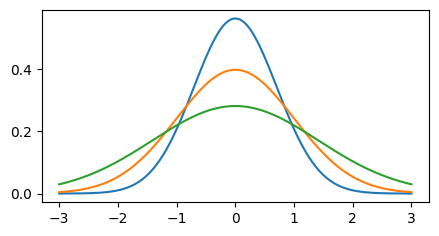

In [2]:
import numpy as np; from scipy.stats import norm; import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 200)
plt.figure(figsize=(5, 2.5))
plt.plot(x, norm.pdf(x, 0, np.sqrt(0.5)), x, norm.pdf(x, 0, 1), x, norm.pdf(x, 0, np.sqrt(2)));

# 2 Teorema de Bayes en el caso continuo

**Teorema de Bayes en el caso continuo:** $\;$ probabilidad de una hipótesis $\,y\,$ después de observar una evidencia (nueva) $x$
$$P(y\mid x) = P(y)\,\frac{p(x\mid y)}{p(x)}$$

**Ejemplo:** $\;x=\,$ resultado de un test de saliva para el diagnóstico de caries
* Sin caries, $\,c=0,\,p(x\mid c=0)\sim\mathcal{N}(\mu=0, \sigma^2=1)$
* Con caries, $\,c=0,\,p(x\mid c=1)\sim\mathcal{N}(\mu=2, \sigma^2=0.5)$
* Sabemos que la probabilidad (a priori) de caries es: $\,P(c=1)=0.34$
* **Si el test da $x=2$, cuál es la probabilidad (a posteriori) de caries?**
$$P(c=1\mid x=2) = P(c=1)\,\dfrac{p(x=2\mid c=1)}{p(x=2)} = 0.340\,\dfrac{0.564}{0.307} = 0.843$$
* Observa que primero había que encontrar la (densidad de) probabilidad (a priori) de test $x=2$:

$$
\begin{align*}
p(x=2)&=P(c=0)p(x=2\mid c=0)+P(c=1)p(x=2\mid c=1)\\
&=(1-0.34)\cdot 0.054+0.34\cdot 0.564=0.227
\end{align*}
$$

In [3]:
Pc1 = 0.34; px2Dc0 = norm.pdf(2, 0, 1); px2Dc1 = norm.pdf(2, 2, np.sqrt(0.5))
px2 = (1-Pc1) * px2Dc0 + Pc1 * px2Dc1; Pc1Dx2 = Pc1 * px2Dc1 / px2
print(f"px2Dc0 = {px2Dc0:.3f}  px2Dc1 = {px2Dc1:.3f}  px2 = {px2:.3f}  Pc1Dx2 = {Pc1Dx2:.3f}")

px2Dc0 = 0.054  px2Dc1 = 0.564  px2 = 0.227  Pc1Dx2 = 0.843


<p style="page-break-after:always;"></p>

# 3 La regla de decisión de Bayes

**Regla de decisión de Bayes:** $\;$ predice una hipótesis después de observar una evidencia $\,x\,$ mediante la elección, entre un conjunto de hipótesis posibles $\,\mathcal{C},\,$ de una hipótesis de máxima **probabilidad a posteriori** (de la observación de la evidencia)
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)$$

**Probabilidad de error:** $\;$ es decir, probabilidad de que la hipótesis predicha sea distinta de la realmente producida
$$P(\text{error}\mid x)=1-P(c^*(x)\mid x)$$

**Optimalidad de la regla de Bayes:** $\;$ ninguna otra elección mejoraría esta probabilidad de error!

**Ejemplo del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0\mid x=2) = 0.116\\ %
P(c=1\mid x=2) = 0.884\end{array}\right)=1$$

**Regla de Bayes en función de probabilidades a priori y (densidades) condicionales de las clases:** $\;$ en lugar (de arg-)maximizar $\,P(c\mid x)\,$ en $c$, lo hacemos en función de $\,P(c)\,p(x\mid c)$ puesto que el resultado es el mismo
$$
c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,\frac{p(x\mid c)}{p(x)} = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)
$$

**Ejemplo del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0)\,p(x=2\mid c=0) = 0.036\\ %
P(c=1)\,p(x=2\mid c=1) = 0.271
\end{array}\right)=1$$

<!--
<p style="page-break-after:always;"></p>
-->

<!--
# 4 Clasificadores generativos y discriminativos

**Regla de Bayes en clasificación:** $\;$ las hipótesis son las clases y la evidencia $x$ es un objeto que clasificamos con mínima probabilidad de error
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; p(x, c) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)$$

**Clasificadores generativos:** $\;$ clasifican a partir de priors y densidades condicionales (estimadas)

**Clasificadores discriminativos:** $\;$ clasifican a partir de las posteriors (estimadas) directamente

**Comparación básica entre generativos y discriminativos:**
* **Preproceso de características:** $\;$ más flexibles los discriminativos porque, a diferencia de los generativos, no requieren modelar densidades de probabilidad sobre el espacio de representación de los datos
* **Dificultad del aprendizaje:** $\;$ más fácil en el caso de los generativos, usualmente con cuentas y medianas
* **Precisión predictiva:** $\;$ mejor los discriminativos puesto que modelar $\,P(c\mid x)\,$ directamente suele ser más fácil que hacerlo por medio de las condicionales de las clases
* **Tratamiento de nuevas clases:** $\;$ más sencillo en el caso de los generativos porque permiten añadir clases nuevas a un problema sin re-entrenar las condicionales de las clases anteriores
-->

# Ejercicios T1.2 Variables continuas y regla de Bayes

**Problema:** $\;$ Considerad la clasificación de flores iris en setosa o no-setosa a partir de la longitud de pétalos, $x$. El estudio empírico siguiente muestra que las distribuciones de $x$ para setosas y no-setosas pueden aproximarse con distribuciones normales de medias y desviaciones estándares:
$$p(x\mid c=\text{set})\sim\mathcal{N}(\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
\qquad\text{y}\qquad%
p(x\mid c=\text{nos})\sim\mathcal{N}(\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)$$

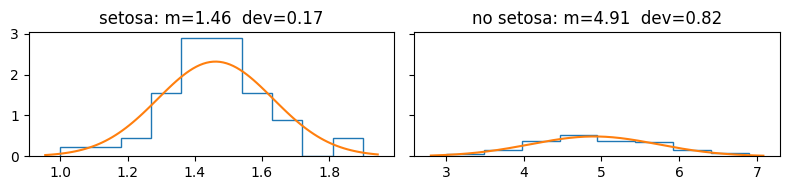

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.datasets import load_iris; from scipy.stats import norm
iris = load_iris(); X = iris.data.astype(np.float16); y = iris.target.astype(np.uint)
x_set = np.squeeze(X[np.where(y==0), 2]); x_nos = np.squeeze(X[np.where(y!=0), 2])
fig, axs = plt.subplots(1, 2, figsize=(8, 2), sharey=True, tight_layout=True)
axs[0].hist(x_set, bins='auto', density=True, histtype='step')
x_set_range = np.arange(*axs[0].get_xlim(), .01)
x_set_mean = x_set.mean(); x_set_dev = np.sqrt(x_set.var())
axs[0].set_title(f'setosa: m={x_set_mean:.2f}  dev={x_set_dev:.2f}')
axs[0].plot(x_set_range, norm.pdf(x_set_range, x_set_mean, x_set_dev))
axs[1].hist(x_nos, bins='auto', density=True, histtype='step')
x_nos_range = np.arange(*axs[1].get_xlim(), .01)
x_nos_mean = x_nos.mean(); x_nos_dev = np.sqrt(x_nos.var())
axs[1].set_title(f'no setosa: m={x_nos_mean:.2f}  dev={x_nos_dev:.2f}')
axs[1].plot(x_nos_range, norm.pdf(x_nos_range, x_nos_mean, x_nos_dev));

Si las densidades normales estimadas son ciertas y la probabilidad a priori de setosa es $1/3$, ¿cuál es la probabilidad a posteriori de que una flor de longitud de pétalos $2$ sea setosa?

**Solución:**
$$\begin{align*}
P&(c=\text{set}\mid x=2)%
=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{p(x=2)}\\
&=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{P(c=\text{set})\,p(x=2\mid c=\text{set})+P(c=\text{nos})\,p(x=2\mid c=\text{nos})}\\
&=\frac{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)}{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)+2/3\cdot\mathcal{N}(x=2\mid\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)}\\
&=\frac{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)}{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)+\frac{2}{0.82}\exp\left(-\frac{(2-4.91)^2}{2\cdot 0.82^2}\,\right)}%
=\frac{0.0379}{0.0379+0.0045}=0.89
\end{align*}$$